In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("Cleaned-Data.csv")

In [5]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [6]:
df.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [7]:
df.shape

(316800, 27)

In [8]:
df.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
ll=LabelEncoder().fit(df['Country'].unique())

In [11]:
df['Country']=ll.transform(df['Country'])

In [12]:
df.sample(2)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
114610,1,0,0,0,0,0,1,1,0,0,...,1,0,0,0,1,0,0,1,0,7
242885,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,9


In [13]:
from sklearn.cluster import KMeans

In [14]:
#elbow method for determining number of clusters
iner=[]
for i in range(1,20):
    model=KMeans(n_clusters=i).fit(df)
    iner.append(model.inertia_)

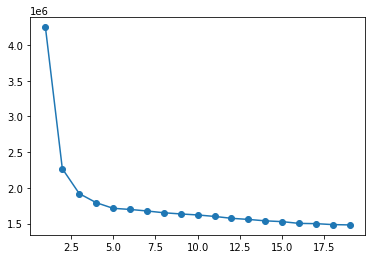

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(1,20),iner,marker='o')

In [33]:
model=KMeans(n_clusters=2).fit(df.drop('Result',axis=1))

In [34]:
model.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [52]:
df['Result']=model.labels_

In [53]:
df.sample(3)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Result
90707,0,0,0,0,0,1,1,1,1,0,...,0,0,0,1,0,1,0,0,3,1
76087,1,1,1,1,1,0,0,1,1,1,...,0,0,0,0,1,0,1,0,3,1
232799,1,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,9,0


In [24]:
df.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country', 'Result'],
      dtype='object')

In [78]:
model.predict([[1,1,1,1,0,0,1,1,1,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,2]])

array([1], dtype=int32)